# Apache Spark Data Analysis

This exercise was realised following Nagesh Singh Chauhan guide: https://towardsdatascience.com/youtube-data-analysis-using-pyspark-85b7cd07216f

For this exercise will be using the YouTube Dataset. I will be analysing just the first 10 columns which corresponds to: <br>
1: Video ID. <br>
2: Video uploader. <br>
3: Interval between the day of establishment of YouTube and the date of uploading of the video. <br>
4: Category of the video. <br>
5: Length of the video. <br>
6: Number of views for the video. <br>
7: Rating on the video. <br>
8: Number of ratings given for the video. <br>
9: Number of comments on the videos. <br>
10: Related video IDs of the uploaded video. <br>

## Setting up Spark in Google Colab

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz
!tar xf spark-2.4.3-bin-hadoop2.7.tgz
!pip install -q findspark

In [0]:
import os
import findspark

In [0]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
findspark.init()

In [0]:
from __future__ import print_function
import sys
from operator import add
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from google.colab import files
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import matplotlib.pyplot as plt
import csv

In [0]:
spark = SparkSession.builder.master("local[*]").appName("Learning_Spark").getOrCreate()

## Preprocessing

In [0]:
schema1 = StructType([
    StructField("f1", StringType(), True),
    StructField("f2", StringType(), True),
    StructField("f3", DoubleType(), True),
    StructField("f4", StringType(), True),
    StructField("f5", DoubleType(), True),
    StructField("f6", DoubleType(), True),
    StructField("f7", DoubleType(), True),
    StructField("f8", DoubleType(), True),
    StructField("f9", DoubleType(), True),
    StructField("f10", StringType(), True),
    StructField("f11", StringType(), True),
    StructField("f12", StringType(), True),
    StructField("f13", StringType(), True),
    StructField("f14", StringType(), True),
    StructField("f15", StringType(), True),
    StructField("f16", StringType(), True),
    StructField("f17", StringType(), True),
    StructField("f18", StringType(), True),
    StructField("f19", StringType(), True),
    StructField("f20", StringType(), True),
    StructField("f21", StringType(), True),
    StructField("f22", StringType(), True),
    StructField("f23", StringType(), True)])

In [0]:
df = spark.read.option("delimiter", "\t").schema(schema1).option("inferSchema", "True").csv("youtubedata.txt")
df.createOrReplaceTempView("youtube_data") # create temporary table

In [9]:
df.printSchema() # schema of the dataset

root
 |-- f1: string (nullable = true)
 |-- f2: string (nullable = true)
 |-- f3: double (nullable = true)
 |-- f4: string (nullable = true)
 |-- f5: double (nullable = true)
 |-- f6: double (nullable = true)
 |-- f7: double (nullable = true)
 |-- f8: double (nullable = true)
 |-- f9: double (nullable = true)
 |-- f10: string (nullable = true)
 |-- f11: string (nullable = true)
 |-- f12: string (nullable = true)
 |-- f13: string (nullable = true)
 |-- f14: string (nullable = true)
 |-- f15: string (nullable = true)
 |-- f16: string (nullable = true)
 |-- f17: string (nullable = true)
 |-- f18: string (nullable = true)
 |-- f19: string (nullable = true)
 |-- f20: string (nullable = true)
 |-- f21: string (nullable = true)
 |-- f22: string (nullable = true)
 |-- f23: string (nullable = true)



In [10]:
df.count(), len(df.columns)

(4100, 23)

In [11]:
df.show()

+-----------+--------------------+------+----------------+-----+---------+----+-------+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|         f1|                  f2|    f3|              f4|   f5|       f6|  f7|     f8|     f9|        f10|        f11|        f12|        f13|        f14|        f15|        f16|        f17|        f18|        f19|        f20|        f21|        f22|        f23|
+-----------+--------------------+------+----------------+-----+---------+----+-------+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|QuRYeRnAuXM|EvilSquirrelPictures|1135.0|  Pets & Animals|252.0|   1075.0|4.96|   46.0|   86.0|gFa1YMEJFag|nRcovJn9xHg|3TYqkBJ9YRk|rSJ8QZWBegU|0TZqX5MbXMA|UEvVksP91kg|ZTopArY7Nbg|0RViGi2Rne8|HT_QlOJbDpg|YZev1

In [0]:
df1 = spark.sql('''select f1 as vdo_id, f2 as vdo_uploader, f3 as vdo_interval, f4 as vdo_category, f5 vdo_length, f6 as vdo_views, f7 as vdo_rating, f8 as vdo_num_rating , f9 as vdo_comm, f10  as vdo_rel_id from youtube_data''')
df1.createOrReplaceTempView("col_4")

In [0]:
df2 = spark.sql('''select vdo_category, COUNT(vdo_category) category_count from col_4 group by vdo_category order by category_count DESC''')
df2.coalesce(1).write.option("delimiter",",").option("header", "true").mode("overwrite").csv('TopCategory')

In [0]:
df3 = spark.sql('''select distinct vdo_id, vdo_rating from col_4 order by vdo_rating DESC''')
df3.coalesce(1).write.option("delimiter",",").option("header", "true").mode("overwrite").csv('vdoRating')

In [0]:
df4 = spark.sql('''select vdo_id, vdo_comm from col_4 order by vdo_comm DESC''')
df4.coalesce(1).write.option("delimiter",",").option("header", "true").mode("overwrite").csv('maxComment')

## Data Visualization

In [0]:
x = []
y = []
with open('TopCategory/part-00000-2888e8f2-63b2-4bb8-b8f3-880270beb04c-c000.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[0])
        y.append(row[1])

No handles with labels found to put in legend.


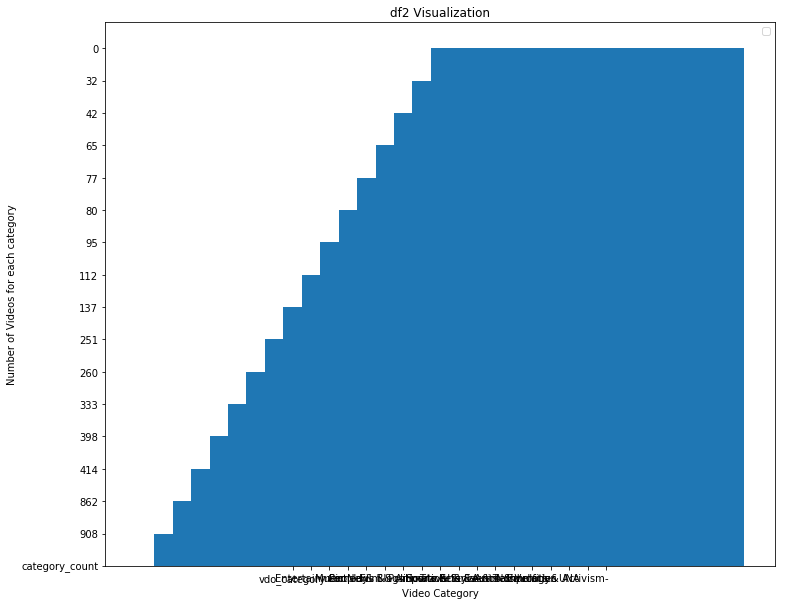

In [18]:
#df2
plt.figure(figsize=(12,10))
plt.bar(x, y, '-')
plt.xlabel('Video Category')
plt.ylabel('Number of Videos for each category')
plt.title('df2 Visualization')
plt.legend()
plt.show()

In [0]:
x = []
y = []
with open('vdoRating/part-00000-6edf4752-007d-4e21-abc4-9b2d450bb4f4-c000.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[0])
        y.append(row[1])

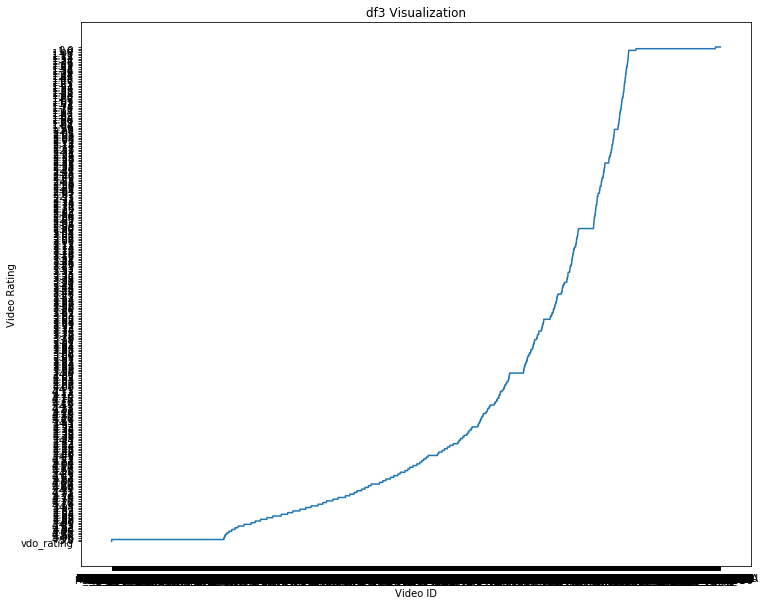

In [22]:
#df3
plt.figure(figsize=(12,10))
plt.plot(x, y, '-')
plt.xlabel('Video ID')
plt.ylabel('Video Rating')
plt.title('df3 Visualization')
plt.show()

In [0]:
x = []
y = []
with open('maxComment/part-00000-34b86922-8331-4400-a91d-0b670abd09a5-c000.csv', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(row[0])
        y.append(row[1])

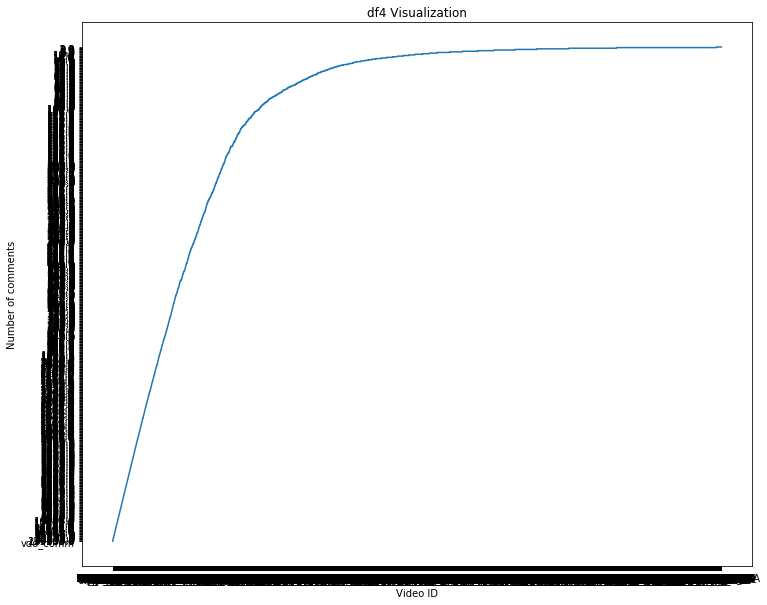

In [25]:
#df4
plt.figure(figsize=(12,10))
plt.plot(x, y, '-')
plt.xlabel('Video ID')
plt.ylabel('Number of comments')
plt.title('df4 Visualization')
plt.show()

## Machine Learning

In [0]:
# Creating a dataframe suitable for Machine Learning using Spark

inputcols = ["f3",  "f5", "f6", "f8","f9"]
assembler = VectorAssembler(inputCols= inputcols,
                            outputCol = "predictors")

In [28]:
predictors = assembler.setHandleInvalid("skip").transform(df)
predictors.columns

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'predictors']

In [29]:
mldf = predictors.select("predictors", "f7")
mldf.show(15,truncate=False)

+---------------------------------------+----+
|predictors                             |f7  |
+---------------------------------------+----+
|[1135.0,252.0,1075.0,46.0,86.0]        |4.96|
|[1135.0,169.0,228.0,5.0,3.0]           |5.0 |
|[1135.0,95.0,356.0,13.0,1.0]           |4.31|
|[1135.0,118.0,1115.0,57.0,73.0]        |2.23|
|[1135.0,83.0,281.0,9.0,16.0]           |2.67|
|[1135.0,49.0,1196.0,6.0,5.0]           |3.67|
|[1136.0,145.0,11.0,0.0,0.0]            |0.0 |
|[1135.0,9.0,490.0,26.0,15.0]           |2.31|
|[1095.0,14.0,1349.0,22.0,13.0]         |2.09|
|[1136.0,61.0,29.0,0.0,0.0]             |0.0 |
|[541.0,152.0,483053.0,2689.0,2932.0]   |4.65|
|[1135.0,253.0,63.0,3.0,2.0]            |5.0 |
|[964.0,173.0,106929.0,1010.0,1484.0]   |4.39|
|[690.0,176.0,2464486.0,13342.0,11997.0]|4.5 |
|[1082.0,213.0,46183.0,280.0,247.0]     |4.71|
+---------------------------------------+----+
only showing top 15 rows



In [0]:
train_data,test_data = mldf.randomSplit([0.8,0.2])

In [0]:
lr = LinearRegression(featuresCol = 'predictors', labelCol = 'f7')
lrModel = lr.fit(train_data)
pred = lrModel.evaluate(test_data)

In [0]:
eval = RegressionEvaluator(labelCol="f7", predictionCol="prediction", metricName="rmse")

In [0]:
rmse = eval.evaluate(pred.predictions)
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})

In [34]:
lrModel.coefficients

DenseVector([-0.0013, 0.0011, -0.0, 0.0001, -0.0])

In [35]:
lrModel.intercept

4.739912795715572

In [36]:
pred.predictions.show(5)

+--------------------+----+------------------+
|          predictors|  f7|        prediction|
+--------------------+----+------------------+
|(5,[0,1],[1135.0,...| 0.0|3.2654060249519814|
|[0.0,60.0,36869.0...|4.67| 4.808005844090698|
|[0.0,61.0,152891....|4.18| 4.809394270201386|
|[0.0,63.0,199361....|4.79| 4.813877904378161|
|[0.0,87.0,217431....|4.34| 4.843142546780268|
+--------------------+----+------------------+
only showing top 5 rows



In [37]:
print("Overall model loss using RMSE, MSE, MAE and R2")
rmse, mse, mae, r2

Overall model loss using RMSE, MSE, MAE and R2


(1.5656332415453058, 2.451207447031662, 1.228812249025163, 0.07328308153149188)